---
layout: post  
---

In [1]:
import Pkg
pkgs = [
    "Eisenia",
    "Random",
    "Revise",
    "BioSequences",
    "Test",
    "LightGraphs",
    "Primes",
    "Statistics"
]

for pkg in pkgs
    try
        Pkg.add(pkg)
    catch
        # tried to install an unregistered local package
    end
    eval(Meta.parse("import $pkg"))
end

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
┌ Info: Precompiling Eisenia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
└ @ Base loading.jl:1278
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Res

In [13]:
n_sequences = 2^0

1

In [14]:
seqlen = 10^1

10

In [15]:
n_observations = 10^2

100

In [16]:
sequences = [BioSequences.randdnaseq(Random.seed!(i), seqlen) for i in 1:n_sequences]

1-element Array{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}},1}:
 TCGTCCCAGG

In [17]:
error_rate = 0.05

0.05

In [18]:
observations = [
    Eisenia.observe(rand(sequences), error_rate = error_rate) for i in 1:n_observations
]
maximum_likelihood_observations = observations

100-element Array{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}},1}:
 CCTGGGAGCGA
 CCTGGGACGA
 CCTGGGACGT
 TCGCCCAGG
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 GCTGGGACGA
 CCTGGGACGA
 TCGTCCCAGA
 CCCGCGACGAA
 CCTGGGACGA
 TCGTCCCAGG
 ⋮
 TCGTCCCAGG
 CCTGGGACGA
 TCGTCCCAGG
 CCTGGGACGA
 TCTCCCAGG
 TCGTCCCAGG
 TCGTCCCAGG
 CGCCCAGGG
 CCTGGGACGA
 CCTGGACGA
 CCTGGCACGA
 TCAGTCCCACGG

In [19]:
function my_isequal(a, b)
    return (a == b) || (BioSequences.reverse_complement(a) == b)
end

my_isequal (generic function with 1 method)

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
#     display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
# end

These all seem fine, let's see what the graphs look like for each

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
#     display(Eisenia.plot_graph(graph))
# end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [ ]:
# k = 3
# graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

In [ ]:
# total_edits_accepted = 0
# total_bases_evaluated = 0
# maximum_likelihood_observations = BioSequences.LongDNASeq[]
# for observation in observations
#     if length(observation) >= k
#         total_bases_evaluated += length(observation)
#         optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
#         total_edits_accepted += edit_distance
#         maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
#         was_equal_before = my_isequal(observation, first(sequences))
#         if !was_equal_before
#             @show my_isequal(maximum_likelihood_observation, first(sequences))
#         end
#         push!(maximum_likelihood_observations, maximum_likelihood_observation)
#     end
# end

In [ ]:
# total_edits_accepted / total_bases_evaluated

In [ ]:
# maximum_likelihood_observations

In [ ]:
# observations = maximum_likelihood_observations
# maximum_likelihood_observations = BioSequences.LongDNASeq[]

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
#     display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
# end

These all seem fine, let's see what the graphs look like for each

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
#     display(Eisenia.plot_graph(graph))
# end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [ ]:
# k = 3
# graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

In [ ]:
# total_edits_accepted = 0
# total_bases_evaluated = 0

In [ ]:
# for observation in observations
#     if length(observation) >= k
#         total_bases_evaluated += length(observation)
#         optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
#         total_edits_accepted += edit_distance
#         maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
#         was_equal_before = my_isequal(observation, first(sequences))
#         if !was_equal_before
#             @show my_isequal(maximum_likelihood_observation, first(sequences))
#         end
#         push!(maximum_likelihood_observations, maximum_likelihood_observation)
#     end
# end

In [ ]:
# total_edits_accepted / total_bases_evaluated

In [ ]:
# observations = maximum_likelihood_observations
# maximum_likelihood_observations = BioSequences.LongDNASeq[]

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
#     display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
# end

These all seem fine, let's see what the graphs look like for each

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
#     display(Eisenia.plot_graph(graph))
# end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [ ]:
# k = 3
# graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

In [ ]:
# total_edits_accepted = 0
# total_bases_evaluated = 0

In [ ]:
# for observation in observations
#     if length(observation) >= k
#         total_bases_evaluated += length(observation)
#         optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
#         total_edits_accepted += edit_distance
#         maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
#         was_equal_before = my_isequal(observation, first(sequences))
#         if !was_equal_before
#             @show my_isequal(maximum_likelihood_observation, first(sequences))
#         end
#         push!(maximum_likelihood_observations, maximum_likelihood_observation)
#     end
# end

In [ ]:
# total_edits_accepted / total_bases_evaluated

In [ ]:
# observations = maximum_likelihood_observations
# maximum_likelihood_observations = BioSequences.LongDNASeq[]

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
#     display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
# end

These all seem fine, let's see what the graphs look like for each

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
#     display(Eisenia.plot_graph(graph))
# end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [ ]:
# k = 5
# graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

In [ ]:
# total_edits_accepted = 0
# total_bases_evaluated = 0

In [ ]:
# maximum_likelihood_observations = BioSequences.LongDNASeq[]
# for observation in observations
#     if length(observation) >= k
#         total_bases_evaluated += length(observation)
#         optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
#         total_edits_accepted += edit_distance
#         maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
#         was_equal_before = my_isequal(observation, first(sequences))
#         if !was_equal_before
#             @show my_isequal(maximum_likelihood_observation, first(sequences))
#         end
#         push!(maximum_likelihood_observations, maximum_likelihood_observation)
#     end
# end

In [ ]:
# total_edits_accepted / total_bases_evaluated

In [ ]:
# observations = maximum_likelihood_observations

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
#     display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
# end

These all seem fine, let's see what the graphs look like for each

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
#     display(Eisenia.plot_graph(graph))
# end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [ ]:
# k = 5
# graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

In [ ]:
# total_edits_accepted = 0
# total_bases_evaluated = 0

In [ ]:
# maximum_likelihood_observations = BioSequences.LongDNASeq[]
# for observation in observations
#     if length(observation) >= k
#         total_bases_evaluated += length(observation)
#         optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
#         total_edits_accepted += edit_distance
#         maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
#         was_equal_before = my_isequal(observation, first(sequences))
#         if !was_equal_before
#             @show my_isequal(maximum_likelihood_observation, first(sequences))
#         end
#         push!(maximum_likelihood_observations, maximum_likelihood_observation)
#     end
# end

In [ ]:
# total_edits_accepted / total_bases_evaluated

In [ ]:
# observations = maximum_likelihood_observations
# maximum_likelihood_observations = BioSequences.LongDNASeq[]

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
#     display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
# end

These all seem fine, let's see what the graphs look like for each

In [ ]:
# for k in Primes.primes(3, min(seqlen, 31))
#     graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
#     display(Eisenia.plot_graph(graph))
# end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [20]:
k = 7
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},7}}({102, 91} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 1 => 75 => [Eisenia.EdgeEvidence(14, 1)],Edge 28 => 61 => [Eisenia.EdgeEvidence(17, 1)],Edge 11 => 64 => [Eisenia.EdgeEvidence(20, 4)],Edge 42 => 100 => [Eisenia.EdgeEvidence(21, 2), Eisenia.EdgeEvidence(39, 2), Eisenia.EdgeEvidence(74, 2), Eisenia.EdgeEvidence(98, 2)],Edge 22 => 33 => [Eisenia.EdgeEvidence(88, 2)],Edge 41 => 100 => [Eisenia.EdgeEvidence(20, 1)],Edge 30 => 67 => [Eisenia.EdgeEvidence(11, 4)],Edge 37 => 44 => [Eisenia.EdgeEvidence(41, 2)],Edge 43 => 68 => [Eisenia.EdgeEvidence(67, 1)],Edge 43 => 80 => [Eisenia.EdgeEvidence(2, 3), Eisenia.EdgeEvidence(5, 1), Eisenia.EdgeEvidence(6, 3), Eisenia.EdgeEvidence(7, 3), Eisenia.EdgeEvidence(8, 3), Eisenia.EdgeEvidence(9, 3), Eisenia.EdgeEvidence(10, 1), Eisenia.EdgeEvidence(12, 3), Eisenia.EdgeEvidence(13, 1), Eisenia.EdgeEvidence(16, 3)  

In [21]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [22]:
observations

100-element Array{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}},1}:
 CCTGGGAGCGA
 CCTGGGACGA
 CCTGGGACGT
 TCGCCCAGG
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 GCTGGGACGA
 CCTGGGACGA
 TCGTCCCAGA
 CCCGCGACGAA
 CCTGGGACGA
 TCGTCCCAGG
 ⋮
 TCGTCCCAGG
 CCTGGGACGA
 TCGTCCCAGG
 CCTGGGACGA
 TCTCCCAGG
 TCGTCCCAGG
 TCGTCCCAGG
 CGCCCAGGG
 CCTGGGACGA
 CCTGGACGA
 CCTGGCACGA
 TCAGTCCCACGG

In [23]:
maximum_likelihood_observations = BioSequences.LongDNASeq[]
for observation in observations
    if length(observation) >= k
        total_bases_evaluated += length(observation)
        optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
        total_edits_accepted += edit_distance
        maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
        was_equal_before = my_isequal(observation, first(sequences))
        if !was_equal_before
            @show my_isequal(maximum_likelihood_observation, first(sequences))
        end
        push!(maximum_likelihood_observations, maximum_likelihood_observation)
    end
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, 

In [24]:
total_edits_accepted / total_bases_evaluated

0.08449304174950298

In [25]:
observations = maximum_likelihood_observations

100-element Array{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}},1}:
 CCTGGGACGA
 CCTGGGACGA
 CCTGGGACGA
 CGTCCCAGG
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 CCTGGGACGA
 CCTGGGACGA
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 TCGTCCCAGG
 ⋮
 TCGTCCCAGG
 CCTGGGACGA
 TCGTCCCAGG
 CCTGGGACGA
 CGTCCCAGG
 TCGTCCCAGG
 TCGTCCCAGG
 CGTCCCAGG
 CCTGGGACGA
 CTGGGACGA
 CCTGGGACGA
 TTCGTCCCAGG

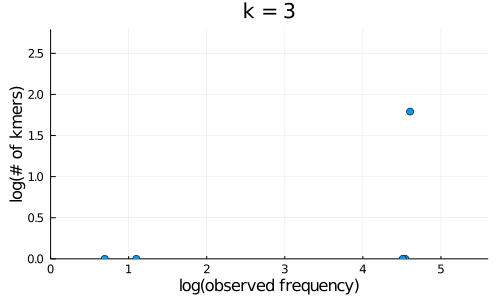

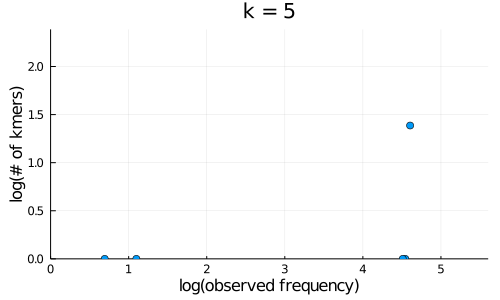

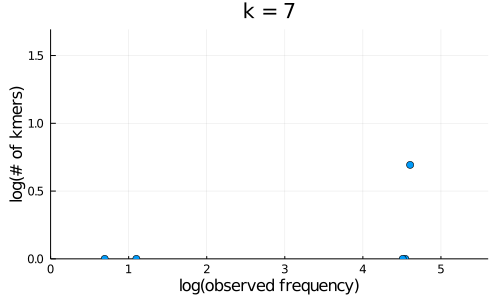

In [26]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

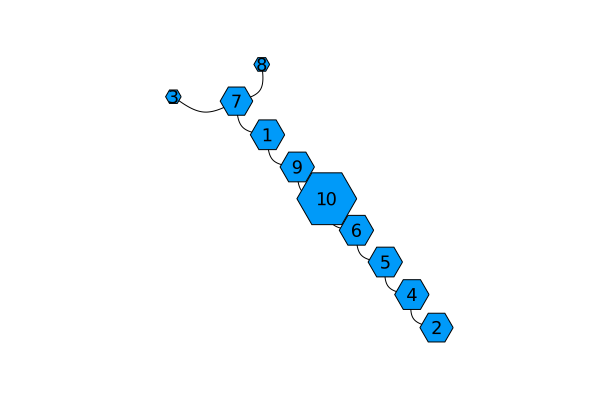

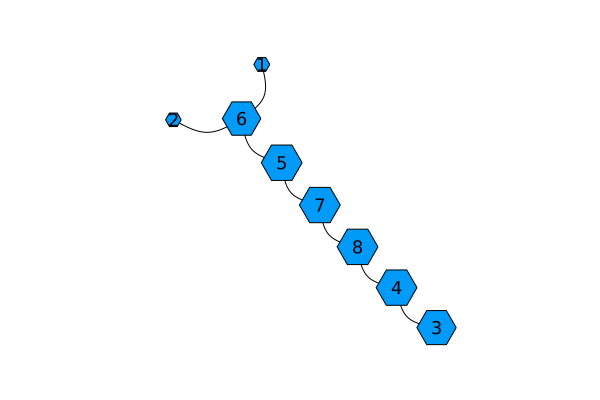

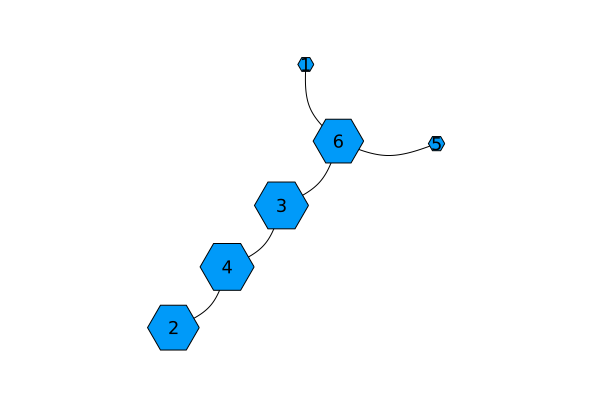

In [27]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [28]:
k = 7
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},7}}({6, 5} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 1 => 6 => [Eisenia.EdgeEvidence(48, 1), Eisenia.EdgeEvidence(61, 1)],Edge 3 => 4 => [Eisenia.EdgeEvidence(1, 2), Eisenia.EdgeEvidence(2, 2), Eisenia.EdgeEvidence(3, 2), Eisenia.EdgeEvidence(4, 1), Eisenia.EdgeEvidence(5, 2), Eisenia.EdgeEvidence(6, 2), Eisenia.EdgeEvidence(7, 2), Eisenia.EdgeEvidence(8, 2), Eisenia.EdgeEvidence(9, 2), Eisenia.EdgeEvidence(10, 2)  …  Eisenia.EdgeEvidence(91, 2), Eisenia.EdgeEvidence(92, 2), Eisenia.EdgeEvidence(93, 1), Eisenia.EdgeEvidence(94, 2), Eisenia.EdgeEvidence(95, 2), Eisenia.EdgeEvidence(96, 1), Eisenia.EdgeEvidence(97, 2), Eisenia.EdgeEvidence(98, 1), Eisenia.EdgeEvidence(99, 2), Eisenia.EdgeEvidence(100, 3)],Edge 3 => 6 => [Eisenia.EdgeEvidence(1, 3), Eisenia.EdgeEvidence(2, 3), Eisenia.EdgeEvidence(3, 3), Eisenia.EdgeEvidence(5, 1), Eisenia.EdgeEvidence(6,

In [29]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [30]:
maximum_likelihood_observations = BioSequences.LongDNASeq[]
for observation in observations
    if length(observation) >= k
        total_bases_evaluated += length(observation)
        optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
        total_edits_accepted += edit_distance
        maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
        was_equal_before = my_isequal(observation, first(sequences))
        if !was_equal_before
            @show my_isequal(maximum_likelihood_observation, first(sequences))
        end
        push!(maximum_likelihood_observations, maximum_likelihood_observation)
    end
end

my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_obse

In [31]:
total_edits_accepted / total_bases_evaluated

0.0

In [ ]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

In [ ]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

In [ ]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal